In [2]:
# import relevant libraries
import pandas as pd

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# load data into a pandas dataframe
crime_df = pd.read_csv("dataset/crime.csv", encoding = "ISO-8859-1")

In [5]:
# get the dimension of the dataframe
crime_df.shape

(319073, 17)

In [6]:
# get the fields
crime_df.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [7]:
# get the information about the dataframe
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
INCIDENT_NUMBER        319073 non-null object
OFFENSE_CODE           319073 non-null int64
OFFENSE_CODE_GROUP     319073 non-null object
OFFENSE_DESCRIPTION    319073 non-null object
DISTRICT               317308 non-null object
REPORTING_AREA         319073 non-null object
SHOOTING               1019 non-null object
OCCURRED_ON_DATE       319073 non-null object
YEAR                   319073 non-null int64
MONTH                  319073 non-null int64
DAY_OF_WEEK            319073 non-null object
HOUR                   319073 non-null int64
UCR_PART               318983 non-null object
STREET                 308202 non-null object
Lat                    299074 non-null float64
Long                   299074 non-null float64
Location               319073 non-null object
dtypes: float64(2), int64(4), object(11)
memory usage: 41.4+ MB


In [8]:
# check if the data contains NULL values
crime_df.isnull().sum().any()
# True, meaning there are NULL values

True

In [9]:
# get the value count of 'SHOOTING' column
crime_df['SHOOTING'].value_counts()

Y    1019
Name: SHOOTING, dtype: int64

In [10]:
# drop a column from the dataframe
updated_crimedf = crime_df.drop(['SHOOTING'], axis=1)

In [11]:
# check columns
updated_crimedf.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'OCCURRED_ON_DATE',
       'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART', 'STREET', 'Lat',
       'Long', 'Location'],
      dtype='object')

In [12]:
# drop the rows where at least one element is missing
cleaned_crimedf = updated_crimedf.dropna()

In [13]:
# check the new dimension of the dataframe
cleaned_crimedf.shape

(296573, 16)

In [14]:
# import datetime
from datetime import datetime

# convert string to timestamp
cleaned_crimedf["OCCURRED_ON_DATE"] = cleaned_crimedf["OCCURRED_ON_DATE"].apply(lambda x: \
    datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))

In [15]:
# split OCCURRED_ON_DATE into date and time
cleaned_crimedf['DATE'] = [d.date() for d in cleaned_crimedf['OCCURRED_ON_DATE']]
cleaned_crimedf['TIME'] = [d.time() for d in cleaned_crimedf['OCCURRED_ON_DATE']]

In [16]:
# display first five fields
cleaned_crimedf.head()

INCIDENT_NUMBER  OFFENSE_CODE    OFFENSE_CODE_GROUP   OFFENSE_DESCRIPTION  \
0      I182070945           619               Larceny    LARCENY ALL OTHERS   
1      I182070943          1402             Vandalism             VANDALISM   
2      I182070941          3410                 Towed   TOWED MOTOR VEHICLE   
3      I182070940          3114  Investigate Property  INVESTIGATE PROPERTY   
4      I182070938          3114  Investigate Property  INVESTIGATE PROPERTY   

  DISTRICT REPORTING_AREA    OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR  \
0      D14            808 2018-09-02 13:00:00  2018      9      Sunday    13   
1      C11            347 2018-08-21 00:00:00  2018      8     Tuesday     0   
2       D4            151 2018-09-03 19:27:00  2018      9      Monday    19   
3       D4            272 2018-09-03 21:16:00  2018      9      Monday    21   
4       B3            421 2018-09-03 21:05:00  2018      9      Monday    21   

     UCR_PART       STREET        Lat       Long                     Location  \
0    Part One   LINCOLN ST  42.357791 -71.139371  (42.35779134, -71.13937053)   
1    Part Two     HECLA ST  42.306821 -71.060300  (42.30682138, -71.06030035)   
2  Part Three  CAZENOVE ST  42.346589 -71.072429  (42.34658879, -71.07242943)   
3  Part Three   NEWCOMB ST  42.334182 -71.078664  (42.33418175, -71.07866441)   
4  Part Three     DELHI ST  42.275365 -71.090361  (42.27536542, -71.09036101)   

         DATE      TIME  
0  2018-09-02  13:00:00  
1  2018-08-21  00:00:00  
2  2018-09-03  19:27:00  
3  2018-09-03  21:16:00  
4  2018-09-03  21:05:00

In [17]:
crimedf = cleaned_crimedf

In [22]:
# frequency count of Date
count = crimedf['DATE'].value_counts()

In [23]:
# display the number of crimes for each day
count

2016-09-01    351
2016-01-01    348
2017-09-01    344
2017-09-22    339
2018-06-15    336
2017-09-15    332
2017-05-16    329
2017-08-04    328
2017-09-08    325
2016-09-16    324
2017-02-24    324
2018-05-02    323
2016-04-01    322
2017-08-01    321
2018-06-14    321
2015-09-25    320
2017-06-28    319
2017-06-16    318
2016-11-01    316
2016-05-31    316
2018-05-23    316
2015-09-19    315
2017-06-15    314
2018-06-25    314
2017-05-19    312
2018-05-04    312
2017-06-13    312
2016-10-08    311
2015-10-23    311
2017-07-31    310
             ... 
2016-02-14    188
2018-01-07    187
2017-12-10    187
2018-01-05    186
2018-03-22    185
2017-02-09    185
2016-01-03    185
2018-04-16    185
2017-01-08    185
2018-06-03    185
2015-11-29    184
2015-07-26    184
2015-12-26    182
2015-06-21    182
2017-12-24    182
2016-01-17    181
2016-01-10    180
2015-11-26    180
2016-11-13    180
2018-02-18    179
2018-02-22    176
2016-12-24    176
2016-02-08    164
2018-03-11    161
2018-09-03

In [24]:
# import relevant libraries
import matplotlib.pyplot as plt

Text(0,0.5,'Number of Crimes')

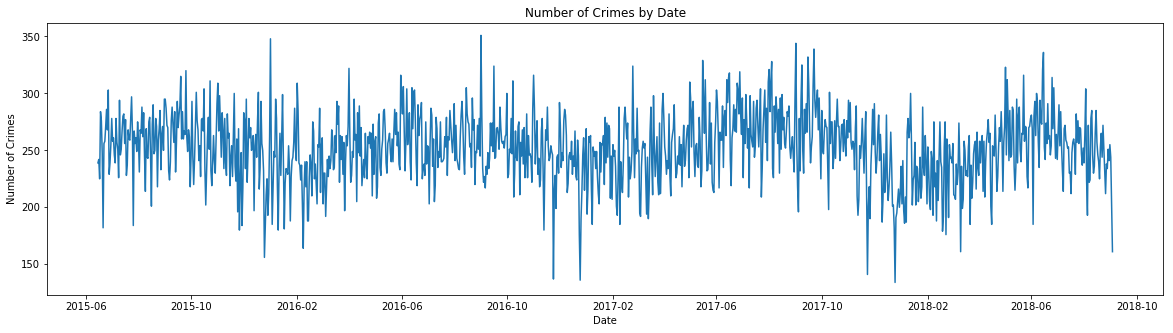

In [25]:
# plot number of incidents per day
fig, ax = plt.subplots(figsize=(20, 5))
crimedf['DATE'].groupby(crimedf['DATE']).count().plot()
plt.title('Number of Crimes by Date')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')